In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carregando o dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [3]:
#vizualizacao inicial dos dados
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#verificando valores nulos
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [7]:
#renomeando colunas
df = df.rename(columns={
    "crim": "crime_rate",               # Taxa de criminalidade
    "zn": "residential_zone",           # % de lotes residenciais
    "indus": "non_retail_land",         # % de acres comerciais
    "chas": "river_dummy",              # 1 se próximo ao rio Charles
    "nox": "nitric_oxide",              # Concentração de NOx
    "rm": "avg_rooms",                  # Nº médio de quartos
    "age": "old_units",                 # % de casas construídas antes de 1940
    "dis": "distance_employment",       # Distância a centros de emprego
    "rad": "highways_access",           # Índice de acessibilidade a rodovias
    "tax": "property_tax",              # Taxa de imposto sobre propriedade
    "ptratio": "pupil_teacher_ratio",   # Relação alunos/professor
    "b": "black_pop",                   # Proporção da população negra
    "lstat": "low_income_pop",          # % da população de baixa renda
    "medv": "median_value"              # Valor médio das casas (alvo)
})

In [8]:
#verificando nova organizacao dos dados
df.head()

,crime_rate,residential_zone,non_retail_land,river_dummy,nitric_oxide,avg_rooms,old_units,distance_employment,highways_access,property_tax,pupil_teacher_ratio,black_pop,low_income_pop,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


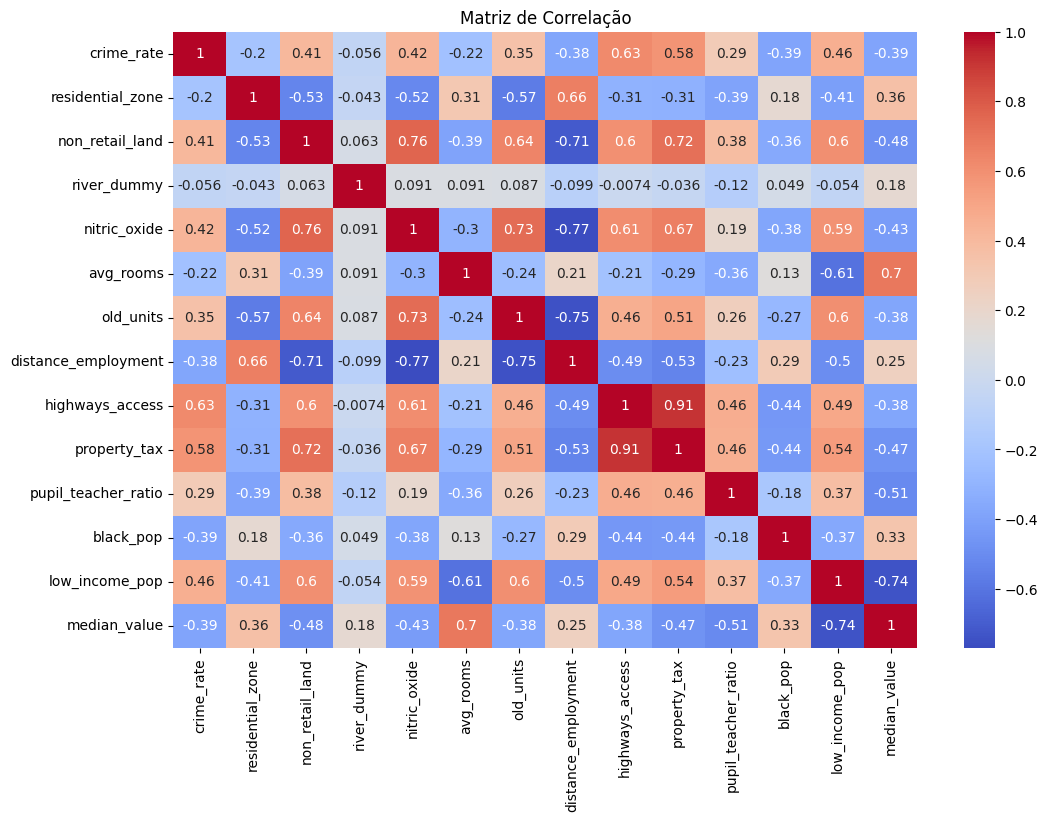

In [10]:
#correlacao entre as variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Matriz de Correlação")
plt.show()

Text(0.5, 1.0, 'Distribuição da Variável Alvo')

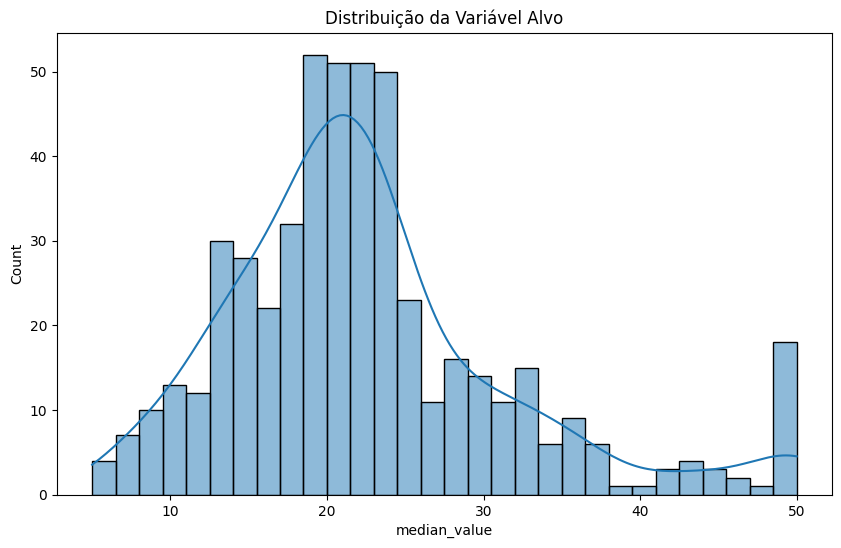

In [11]:
#distribuicao de variável alvo
plt.figure(figsize=(10,6))
sns.histplot(df["median_value"], bins=30, kde=True)
plt.title("Distribuição da Variável Alvo")

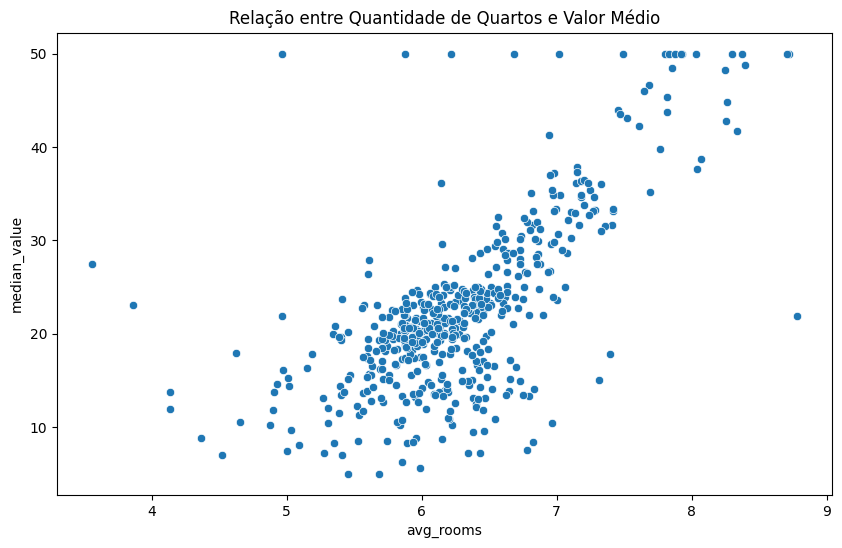

In [14]:
#relacao entre a quantidade de quartos e o valor médio
plt.figure(figsize=(10,6))
sns.scatterplot(x="avg_rooms", y="median_value", data=df)
plt.title("Relação entre Quantidade de Quartos e Valor Médio")
plt.show()

In [15]:
#separando variáveis independentes
X = df.drop("median_value", axis=1)

In [16]:
#definindo variávies alvo
y = df["median_value"]

In [17]:
#bibliotecas de ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
#definindo dados de treino e dados de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#criando gradient boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [20]:
#treinamento do modelo
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [21]:
#previsao do modelo
y_pred = model.predict(X_test)

In [26]:
#avaliando desempenho do modelo
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 6.208861361528038
R² Score: 0.9153342280466539
